<a href="https://colab.research.google.com/github/erdem-tuncer/Quick_Look/blob/main/Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive


In [2]:
# df = pd.read_csv('/content/drive/MyDrive/GDL - Cohort 17 Collaboration Drive/Project Files/AnalyticsDataCleaned.csv') #there are null values at utilization TT column
df = pd.read_csv('/content/drive/MyDrive/GDL - Cohort 17 Collaboration Drive/Project Files/AnalyticsDataCleaned2.csv')

In [3]:
df.head()

,emailID,Email,JobTitle,JobFamily,Skills,SkillType,Location,Country,Vendor,ContractType,...,Unaccounted,Private,Communication,Development,Documentation,Meetings,Support,Utilities,Testing,Utilization
0,Aakash.Kohli@sapvueinfo.com,aakash.kohli@sapvueinfo.com,Tester,QA Testing,Tester,Commodity,Pune,India,Information Systems,T&M,...,3.43,0.92,1.17,0.0,0.2,0.18,0.0,0.13,2.05,0.47
1,Aakash.Kohli@sapvueinfo.com,aakash.kohli@sapvueinfo.com,Tester,QA Testing,Tester,Commodity,Pune,India,Information Systems,T&M,...,5.40,0.90,1.22,0.0,0.2,0.17,0.0,0.13,1.05,0.35
2,Aakash.Kohli@sapvueinfo.com,aakash.kohli@sapvueinfo.com,Tester,QA Testing,Tester,Commodity,Pune,India,Information Systems,T&M,...,5.20,1.02,1.13,0.0,0.0,0.00,0.0,0.00,1.17,0.29
3,Aakash.Kohli@sapvueinfo.com,aakash.kohli@sapvueinfo.com,Tester,QA Testing,Tester,Commodity,Pune,India,Information Systems,T&M,...,5.31,0.98,1.13,0.0,0.0,0.00,0.0,0.13,1.05,0.29
4,Aakash.Kohli@sapvueinfo.com,aakash.kohli@sapvueinfo.com,Tester,QA Testing,Tester,Commodity,Pune,India,Information Systems,T&M,...,5.48,0.92,1.19,0.0,0.2,0.18,0.0,0.13,1.03,0.34


In [4]:
df.select_dtypes('object').nunique()

emailID         2107
Email           2107
JobTitle          19
JobFamily          8
Skills            24
SkillType          2
Location           8
Country            2
Vendor            17
ContractType       2
Date             149
StartTime        238
EndTime         1515
dtype: int64

In [5]:
df.shape

(312765, 25)

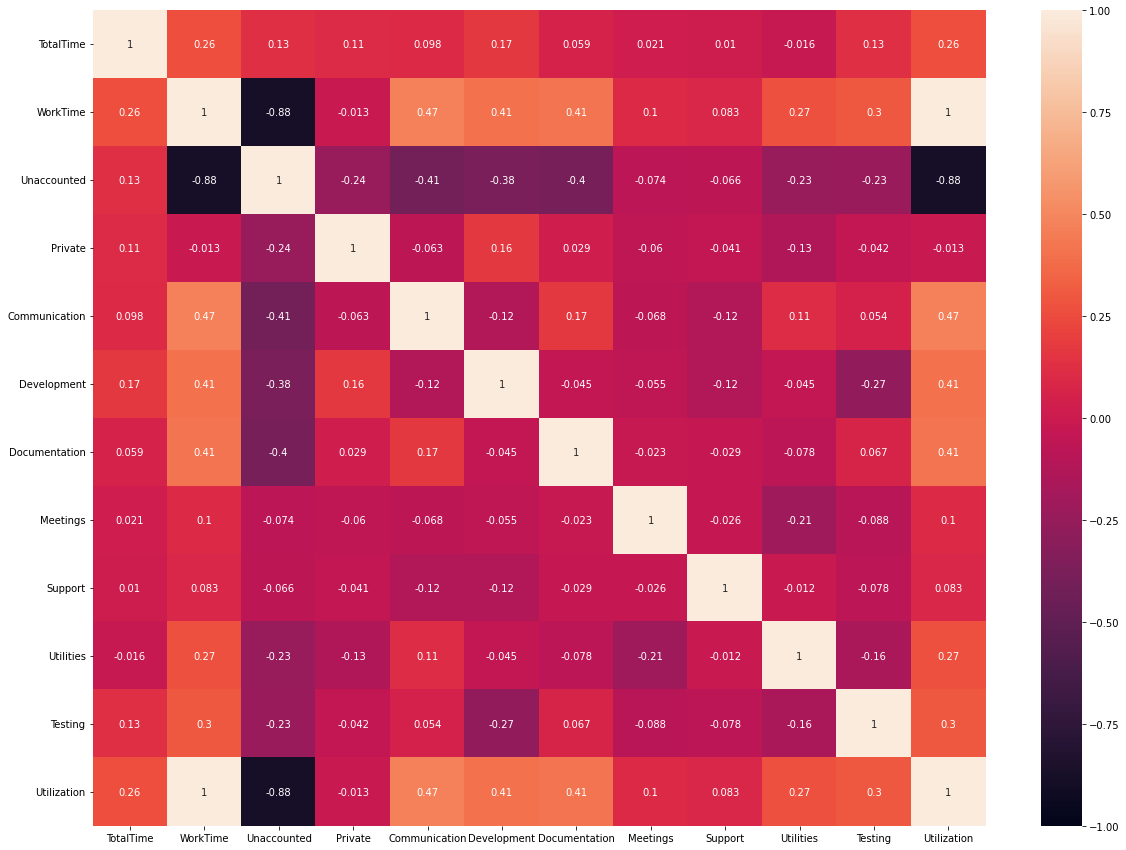

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1);

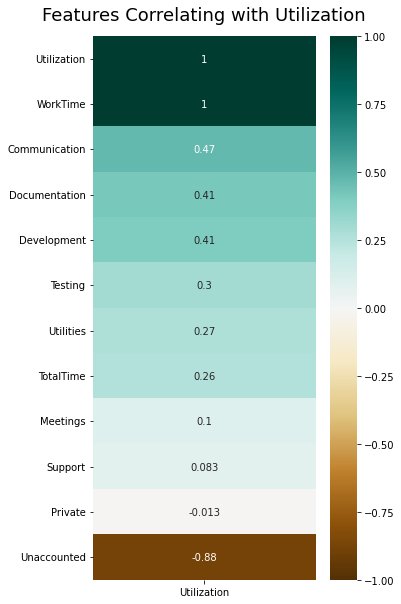

In [7]:
corrMatrix = df.corr()

plt.figure(figsize=(5, 10))
heatmap = sns.heatmap(corrMatrix[['Utilization']].sort_values(by='Utilization', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Utilization', fontdict={'fontsize':18}, pad=16);

- Utilization seems to be highly positively correlated with `WorkTime` as expected, and highly negatively correlated with `Unaccounted`.
- Decision Trees don't necessarily mind multicollinearity, but this will definitely result in some features dominating the feature importance. 
- Let's train the algorithm, check the feature importances it comes up with. And then iteratively start dropping correlated columns and check importances. 

In [8]:
df.shape

(312765, 25)

In [9]:
df = df.drop(['emailID', 'Email', 'Date', 'StartTime', 'EndTime'], axis=1) # we do not need these columns

In [10]:
df.shape

(312765, 20)

## dealing with categorical values

In [11]:
 #we use this Ordinal encoder instead of get_dummies
from sklearn.preprocessing import OrdinalEncoder

In [12]:
categorical = df.select_dtypes("object").columns
categorical

Index(['JobTitle', 'JobFamily', 'Skills', 'SkillType', 'Location', 'Country',
       'Vendor', 'ContractType'],
      dtype='object')

In [13]:
enc = OrdinalEncoder()
df[categorical] = enc.fit_transform(df[categorical])
df.head()

,JobTitle,JobFamily,Skills,SkillType,Location,Country,Vendor,ContractType,TotalTime,WorkTime,Unaccounted,Private,Communication,Development,Documentation,Meetings,Support,Utilities,Testing,Utilization
0,18.0,6.0,23.0,0.0,7.0,0.0,10.0,1.0,8.08,3.73,3.43,0.92,1.17,0.0,0.2,0.18,0.0,0.13,2.05,0.47
1,18.0,6.0,23.0,0.0,7.0,0.0,10.0,1.0,9.07,2.77,5.40,0.90,1.22,0.0,0.2,0.17,0.0,0.13,1.05,0.35
2,18.0,6.0,23.0,0.0,7.0,0.0,10.0,1.0,8.52,2.30,5.20,1.02,1.13,0.0,0.0,0.00,0.0,0.00,1.17,0.29
3,18.0,6.0,23.0,0.0,7.0,0.0,10.0,1.0,8.60,2.31,5.31,0.98,1.13,0.0,0.0,0.00,0.0,0.13,1.05,0.29
4,18.0,6.0,23.0,0.0,7.0,0.0,10.0,1.0,9.13,2.73,5.48,0.92,1.19,0.0,0.2,0.18,0.0,0.13,1.03,0.34


# With WorkTime Column 

##Train test split

In [14]:
X = df.drop(['Utilization'],axis=1)
y = df['Utilization']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [16]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test_set": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

## Decision Tree


In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

In [18]:
dt_model = DecisionTreeRegressor(random_state=101)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
y_train_pred = dt_model.predict(X_train)
dt_r2 = r2_score(y_test, y_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred).T

,R2,mae,mse,rmse
train_set,1.0,1.747120e-14,5.953063e-28,2.439890e-14
test_set,1.0,1.598645e-07,1.598644e-09,3.998305e-05


## Feature Importance

In [19]:
dt_feature_imp = pd.DataFrame(index = X.columns, data = dt_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
dt_feature_imp

,Feature Importance
WorkTime,1.000000e+00
Unaccounted,2.986287e-13
Communication,1.537536e-13
TotalTime,9.174734e-14
Utilities,5.998702e-14
Skills,4.964173e-14
JobTitle,4.392082e-14
Documentation,4.297392e-14
Location,1.794165e-14
Meetings,1.507403e-14


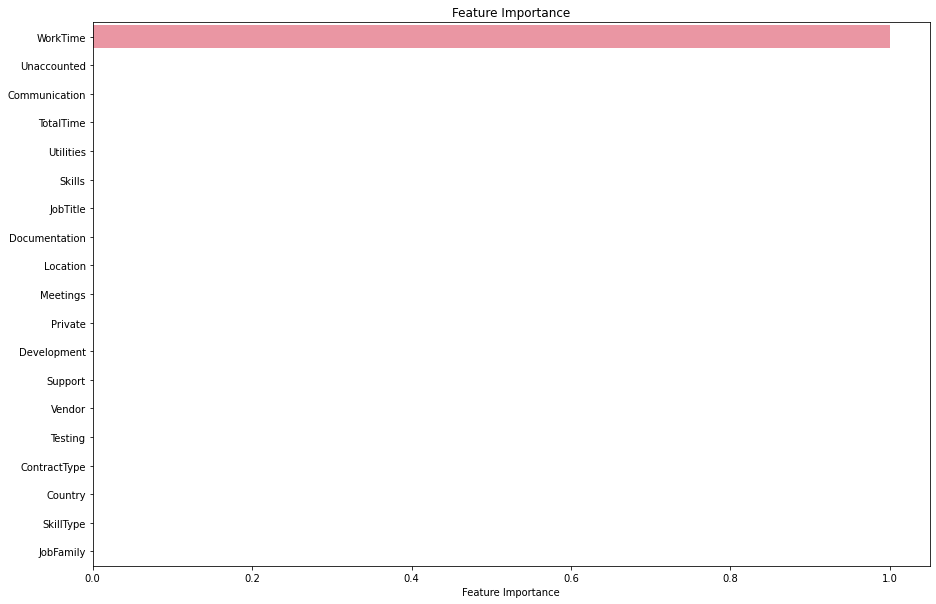

In [20]:
plt.figure(figsize=(15, 10))

sns.barplot(x=dt_feature_imp["Feature Importance"], y=dt_feature_imp.index)
plt.title("Feature Importance")
plt.show()

Since the correlation between the 'Utilization' and 'Worktime' is 1, Worktime is dominating the feature importances. Let's drop this and see new one

# Drop the 'Worktime' 

In [21]:
X = df.drop(['Utilization', 'WorkTime'],axis=1)
y = df['Utilization']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [23]:
dt_model = DecisionTreeRegressor(random_state=101)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
y_train_pred = dt_model.predict(X_train)
dt_r2 = r2_score(y_test, y_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred).T

,R2,mae,mse,rmse
train_set,1.000000,3.604918e-17,5.962859e-33,7.721955e-17
test_set,0.998763,4.742858e-03,7.550078e-05,8.689118e-03


## Feature Importance

In [24]:
dt_feature_imp = pd.DataFrame(index = X.columns, data = dt_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
dt_feature_imp

,Feature Importance
Unaccounted,0.788462
TotalTime,0.137963
Private,0.070578
Communication,0.000699
Vendor,0.000446
Development,0.000344
Documentation,0.000266
Skills,0.000249
Utilities,0.000248
Meetings,0.000180


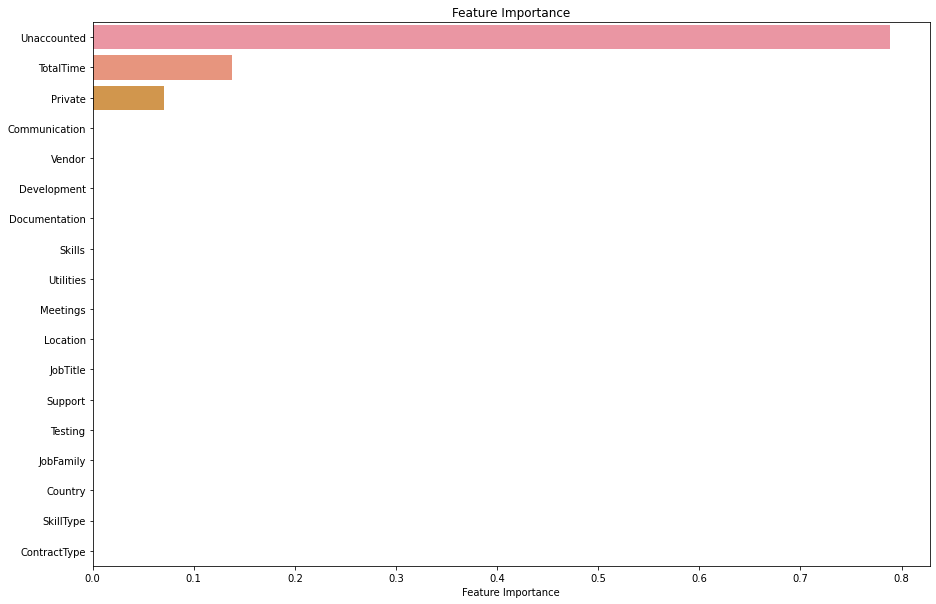

In [25]:
plt.figure(figsize=(15, 10))

sns.barplot(x=dt_feature_imp["Feature Importance"], y=dt_feature_imp.index)
plt.title("Feature Importance")
plt.show()

As expected, 'Unaccounted' is now dominating the importances, as it was highly correlated with our target column. Let's drop this column and check the remaining columns for importances.

# Drop the 'Unaccounted' 

In [26]:
X = df.drop(['Utilization', 'WorkTime', 'Unaccounted'],axis=1)
y = df['Utilization']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [28]:
dt_model = DecisionTreeRegressor(random_state=101)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
y_train_pred = dt_model.predict(X_train)
dt_r2 = r2_score(y_test, y_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred).T

,R2,mae,mse,rmse
train_set,1.000000,1.460897e-17,1.738510e-33,4.169545e-17
test_set,0.994172,9.697856e-03,3.557895e-04,1.886238e-02


## Feature Importance

In [29]:
dt_feature_imp = pd.DataFrame(index = X.columns, data = dt_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
dt_feature_imp

,Feature Importance
Development,0.249278
Communication,0.239031
Testing,0.138269
Documentation,0.121186
Utilities,0.105029
Meetings,0.056182
Support,0.045703
TotalTime,0.024021
Private,0.008846
Location,0.002747


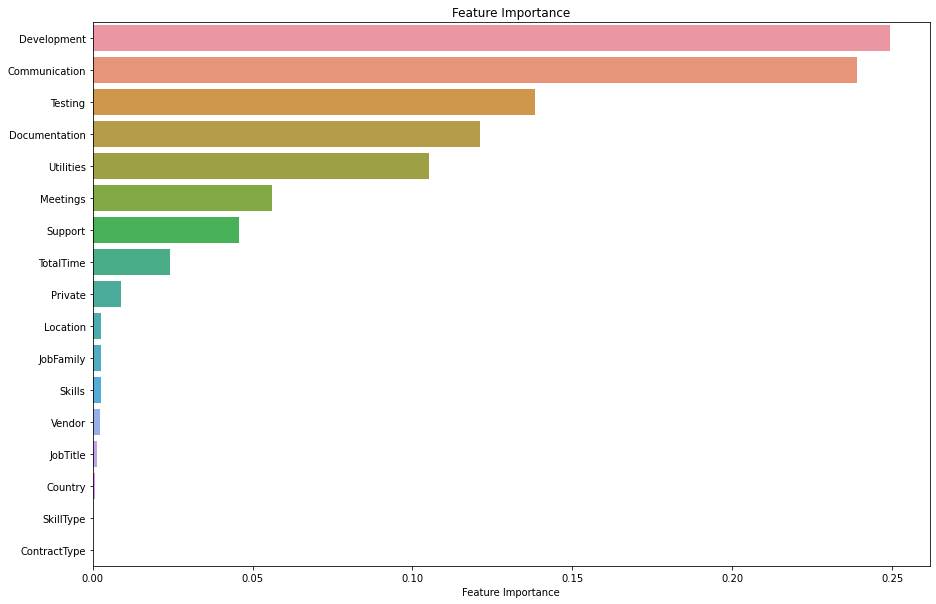

In [30]:
plt.figure(figsize=(15, 10))

sns.barplot(x=dt_feature_imp["Feature Importance"], y=dt_feature_imp.index)
plt.title("Feature Importance")
plt.show()

we can use these features step by step, and up to model scores we will get, we can decide that which features we will go on with